In [1]:
!pip install matplotlib-venn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
gold_data = pd.read_csv('/content/gld_price_data.csv')
gold_data.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
gold_data.tail(10) 

,Date,SPX,GLD,USO,SLV,EUR/USD
2280,4/30/2018,2648.050049,124.589996,13.8000,15.3800,1.208123
2281,5/1/2018,2654.800049,123.709999,13.6100,15.2400,1.199156
2282,5/2/2018,2635.669922,123.650002,13.6700,15.4200,1.195100
2283,5/3/2018,2629.729980,124.279999,13.8200,15.4600,1.198926
2284,5/7/2018,2672.629883,124.570000,14.1000,15.5200,1.193374
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [4]:
gold_data.shape

(2290, 6)

In [5]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
correlation = gold_data.corr()

<Axes: >

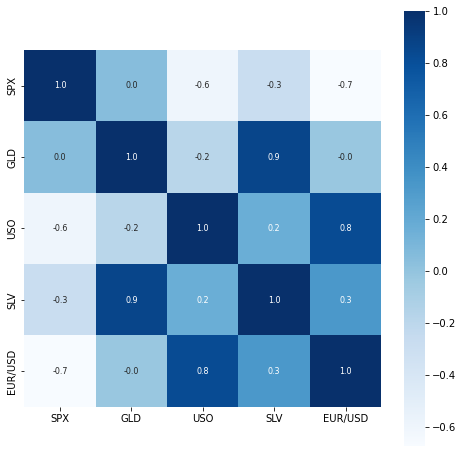

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [10]:
print(correlation['SPX'])

SPX        1.000000
GLD        0.049345
USO       -0.591573
SLV       -0.274055
EUR/USD   -0.672017
Name: SPX, dtype: float64


<ipython-input-11-a4d3dd10daf7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='Green')


<Axes: xlabel='GLD', ylabel='Density'>

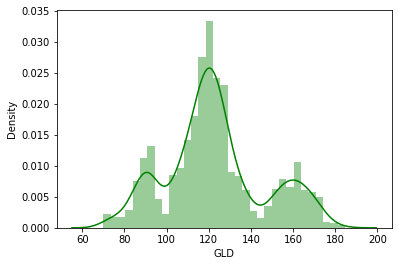

In [11]:
 sns.distplot(gold_data['GLD'],color='Green')

In [12]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [13]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [14]:
#Spliting data into X,Y-Train and X,Y-test

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [16]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [22]:
test_data_prediction= regressor.predict(X_test)
print(test_data_prediction)

[168.71559939  82.07729968 115.91620026 127.722401   120.67960157
 154.58709803 150.65879953 126.32810045 117.59749874 126.1010008
 116.6114012  171.8587004  141.93039935 167.48249848 115.35990023
 117.72700032 136.91700288 170.15650062 160.0577033  158.33529931
 155.18570012 125.04730016 175.84469948 156.87290332 125.17780048
  93.72489934  77.448      120.45000009 119.13489937 167.45510025
  88.28670001 125.27869983  91.22380122 117.77970008 121.09489883
 136.07950099 115.59170136 115.08500071 148.04810028 107.25240099
 103.98080242  87.07849764 126.37880027 117.8656005  153.25489885
 119.5755002  108.29829998 108.02389825  93.22390063 127.12709812
  74.93520069 113.67419936 121.32589991 111.08519867 118.85829896
 120.56449936 158.38040002 168.09250078 146.99219679  85.76659893
  94.32670034  86.91719894  90.70820027 118.91060098 126.44080064
 127.53530008 170.1378002  122.14789916 117.33619909  98.38640064
 168.445201   143.20529914 131.64380204 121.08880204 120.83299937
 119.614400

In [24]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared error: ", error_score)

R Squared error:  0.9886897165180315


In [25]:
Y_test = list(Y_test)

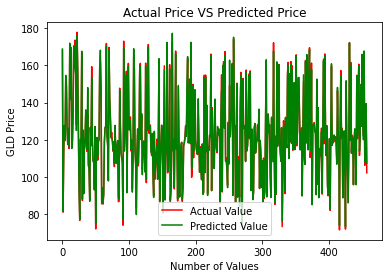

In [33]:
plt.plot(Y_test, color='Red', label= 'Actual Value')
plt.plot(test_data_prediction, color='green', label= 'Predicted Value')
plt.title('Actual Price VS Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

#We have used machine learning **model** to predict the gold price using several other factors into consideration. The green predicts the predicted value of the gold and red tells the actual gold value **bold text**

In [1]:
#Thanks and Regards 
Yours C_YAGNESH

NameError: ignored